# Lesson 03

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
import scipy
from scipy.special import erf
from numpy import exp
from numpy.lib.scimath import log, sqrt


In [2]:
# plot parameters
import sys
sys.path.append('./../Libraries/')
import plt_params

## Plain vanilla option pricing

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes analytic solution for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

In [3]:
# analytic solution for comparison
# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


## Exercise 03.1

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. By sampling **directly** the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$. As usual, in computing statistical uncertainties, use data blocking.

### Direct sampling

In [4]:
# import the files
dir_call = np.loadtxt('03.1/direct_call.csv', delimiter=',', skiprows=1)
dir_put = np.loadtxt('03.1/direct_put.csv', delimiter=',', skiprows=1)

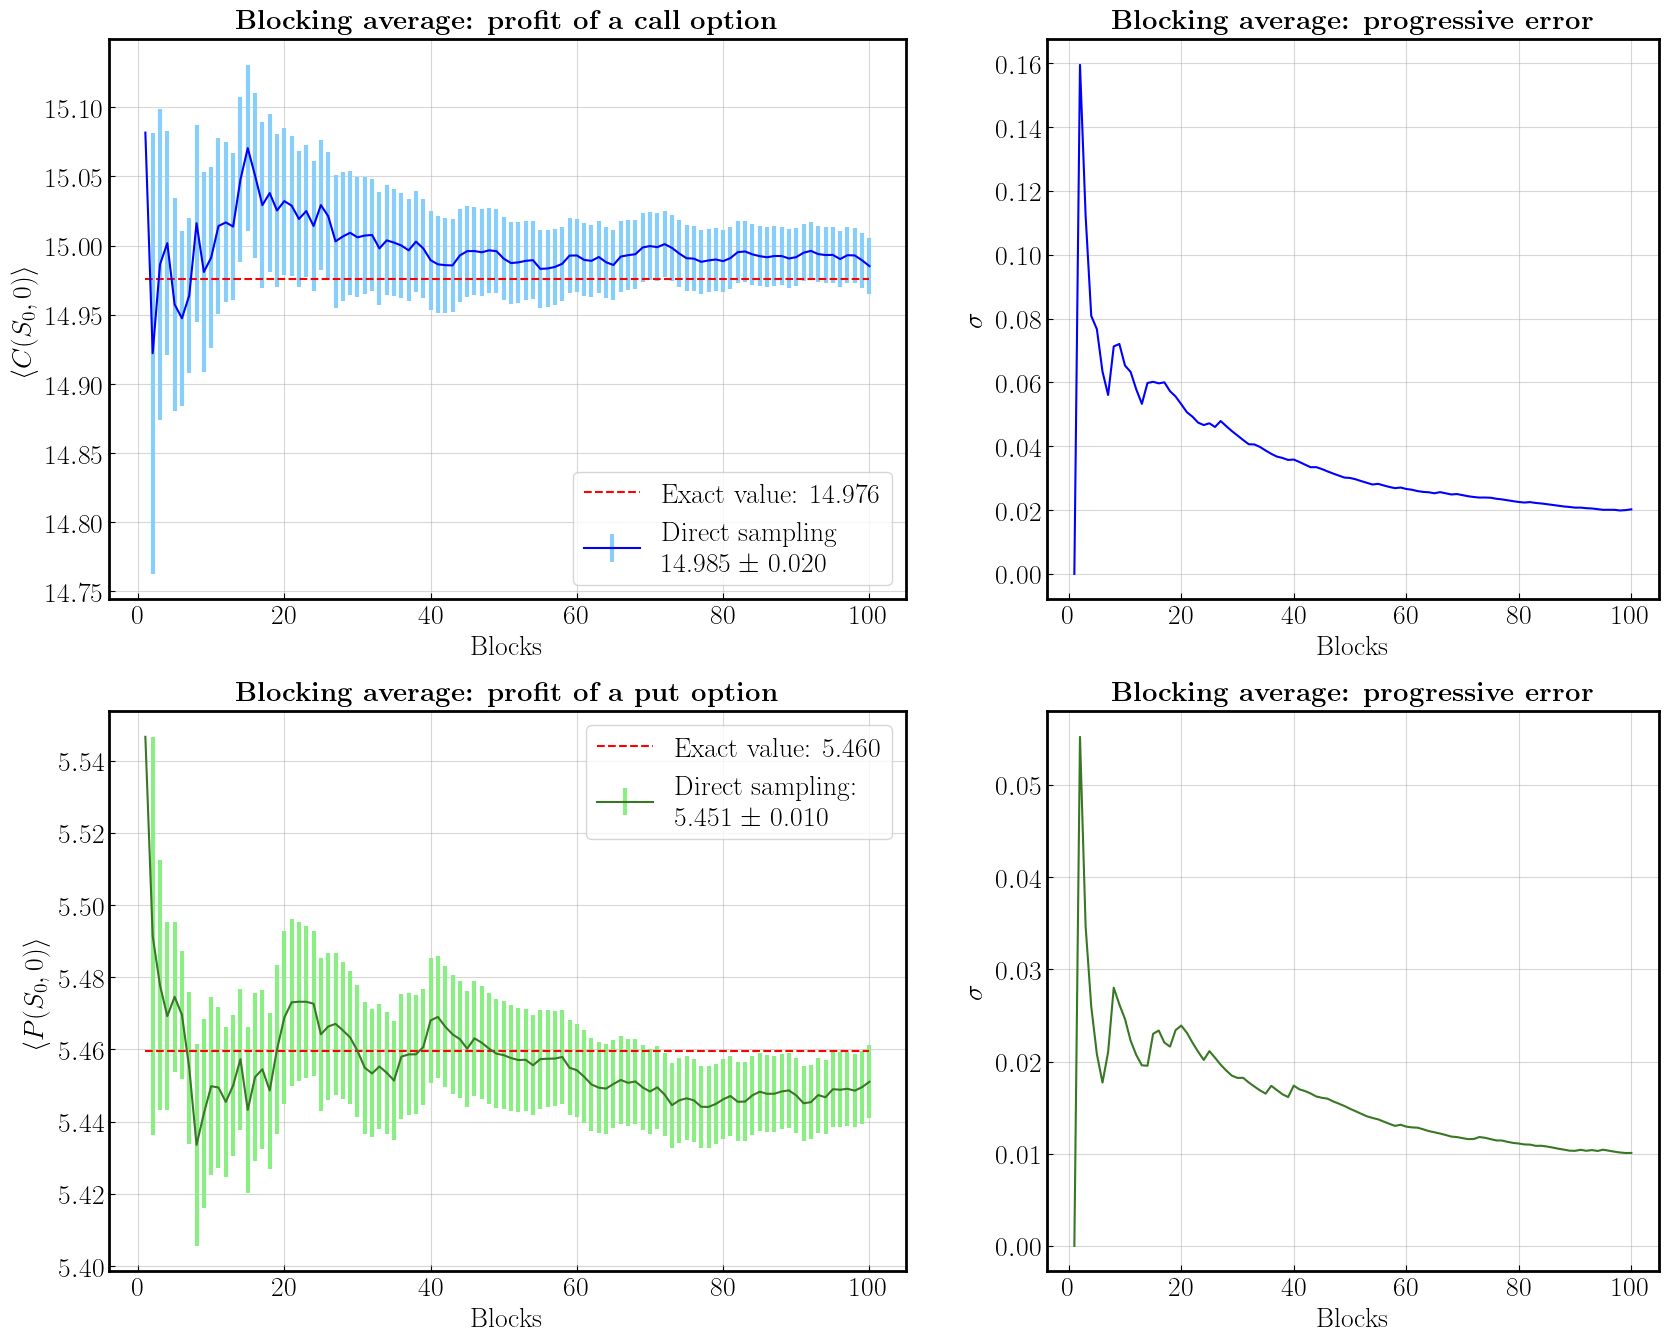

In [30]:
# plots
fig, axs = plt.subplots(2, 2, figsize=(20,16), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0,0].errorbar(dir_call[:,0], dir_call[:,2], yerr=dir_call[:,3], fmt='-', color='blue', ecolor='lightskyblue', elinewidth=3, label='Direct sampling\n' + format(dir_call[-1,2], '.3f') + r' $\pm$ ' + format(dir_call[-1,3], '.3f'))
exact_call = call*np.ones(dir_call.shape[0])
axs[0,0].plot(dir_call[:,0], exact_call, linestyle='--', color='red', label='Exact value: ' + format(call, '.3f'))

axs[0,0].set_title(r'\textbf{Blocking average: profit of a call option}', pad=8)
axs[0,0].set_xlabel('Blocks')
axs[0,0].set_ylabel(r'$\langle C(S_0,0) \rangle$', labelpad=6)
axs[0,0].legend(loc='lower right')


axs[0,1].plot(dir_call[:,0], dir_call[:,3], color='blue')

axs[0,1].set_title(r'\textbf{Blocking average: progressive error}', pad=8)
axs[0,1].set_xlabel('Blocks')
axs[0,1].set_ylabel(r'$\sigma$', labelpad=6)


axs[1,0].errorbar(dir_put[:,0], dir_put[:,2], yerr=dir_put[:,3], fmt='-', color='#387723', ecolor='#8BEE84', elinewidth=3, label='Direct sampling:\n' + format(dir_put[-1,2], '.3f') + r' $\pm$ ' + format(dir_put[-1,3], '.3f'))
exact_put = put*np.ones(dir_put.shape[0])
axs[1,0].plot(dir_put[:,0], exact_put, linestyle='--', color='red', label='Exact value: ' + format(put, '.3f'))

axs[1,0].set_title(r'\textbf{Blocking average: profit of a put option}', pad=8)
axs[1,0].set_xlabel('Blocks')
axs[1,0].set_ylabel(r'$\langle P(S_0,0) \rangle$', labelpad=6)
axs[1,0].legend()


axs[1,1].plot(dir_put[:,0], dir_put[:,3], color='#387723')

axs[1,1].set_title(r'\textbf{Blocking average: progressive error}', pad=8)
axs[1,1].set_xlabel('Blocks')
axs[1,1].set_ylabel(r'$\sigma$', labelpad=6)
              
plt.show()

### Indirect sampling

In [26]:
# import the files
indir_call = np.loadtxt('03.1/indirect_call.csv', delimiter=',', skiprows=1)
indir_put = np.loadtxt('03.1/indirect_put.csv', delimiter=',', skiprows=1)

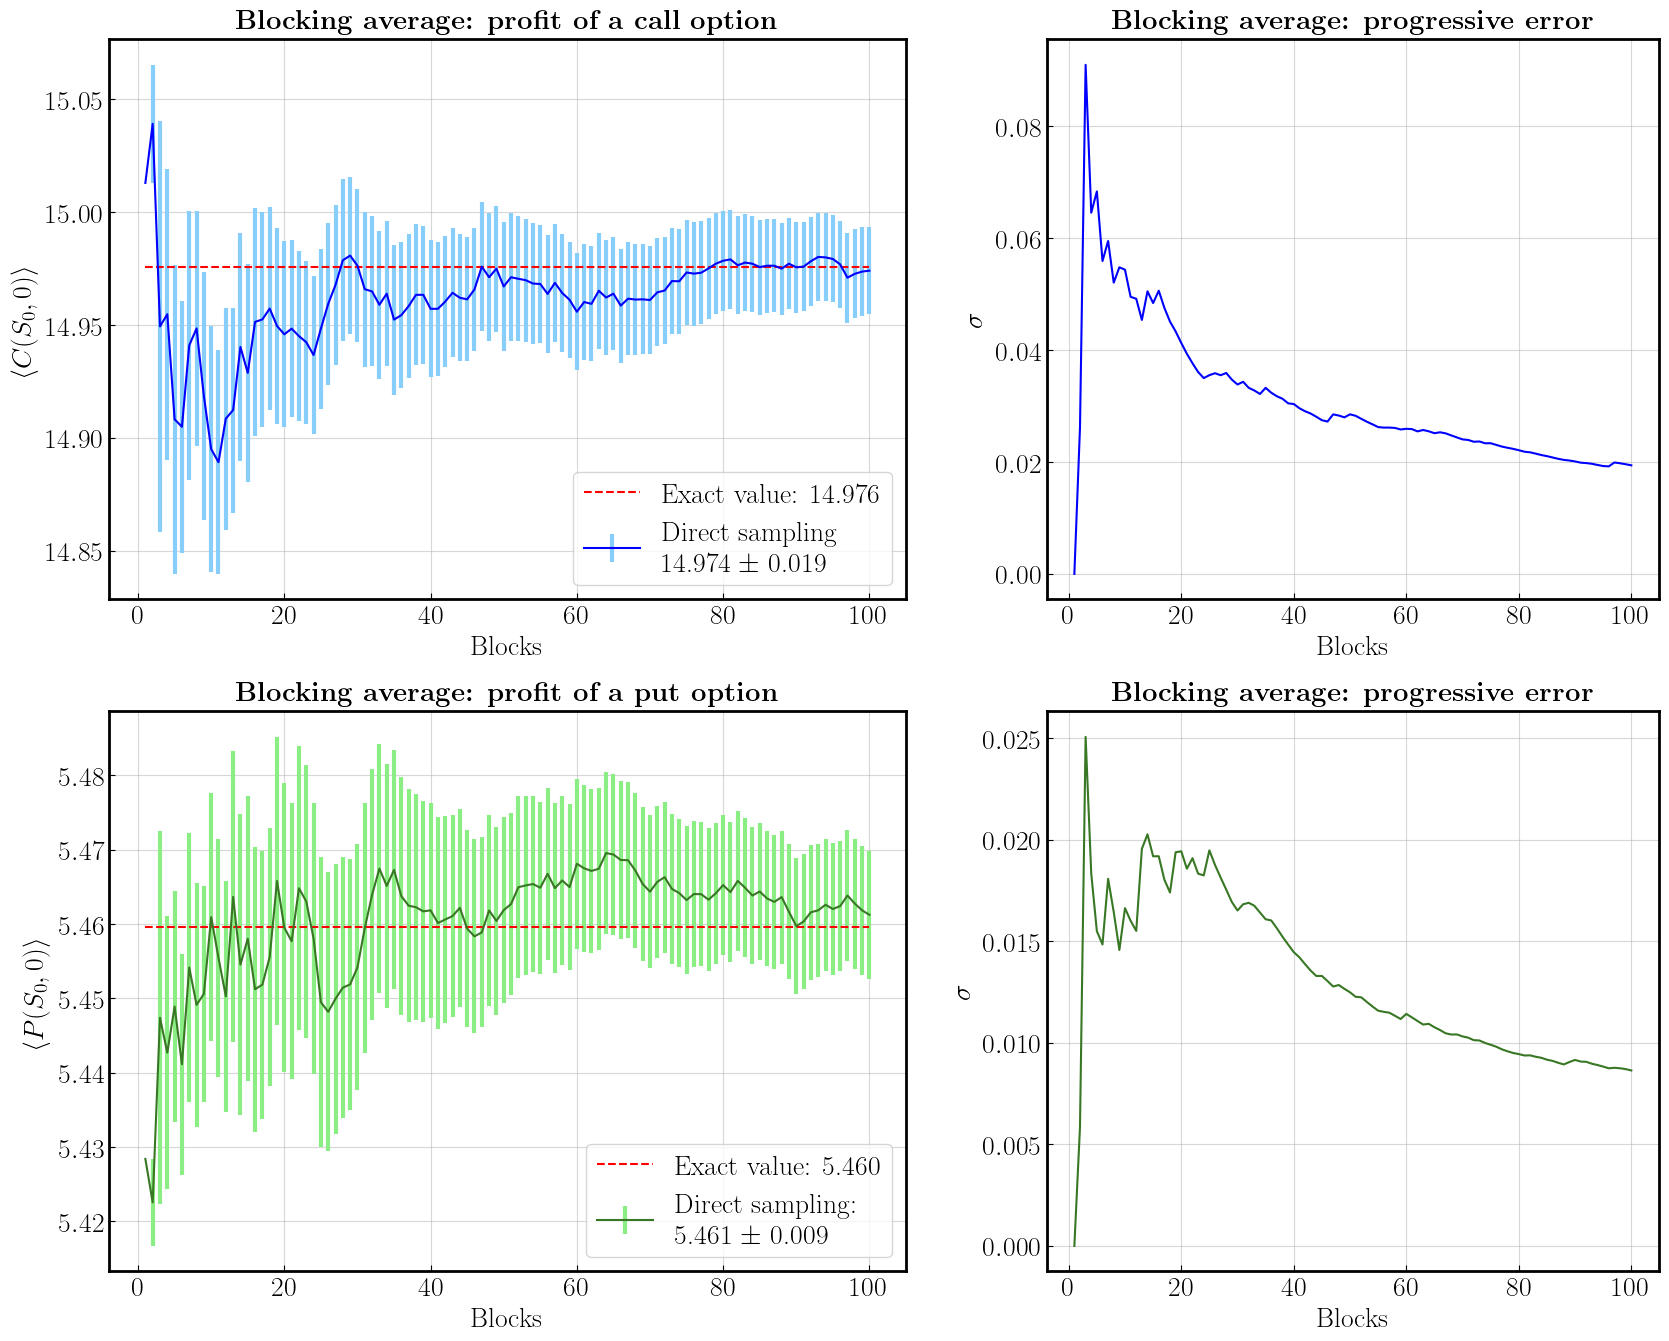

In [31]:
# plots
fig, axs = plt.subplots(2, 2, figsize=(20,16), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0,0].errorbar(indir_call[:,0], indir_call[:,2], yerr=indir_call[:,3], fmt='-', color='blue', ecolor='lightskyblue', elinewidth=3, label='Direct sampling\n' + format(indir_call[-1,2], '.3f') + r' $\pm$ ' + format(indir_call[-1,3], '.3f'))
exact_call = call*np.ones(indir_call.shape[0])
axs[0,0].plot(indir_call[:,0], exact_call, linestyle='--', color='red', label='Exact value: ' + format(call, '.3f'))

axs[0,0].set_title(r'\textbf{Blocking average: profit of a call option}', pad=8)
axs[0,0].set_xlabel('Blocks')
axs[0,0].set_ylabel(r'$\langle C(S_0,0) \rangle$', labelpad=6)
axs[0,0].legend(loc='lower right')


axs[0,1].plot(indir_call[:,0], indir_call[:,3], color='blue')

axs[0,1].set_title(r'\textbf{Blocking average: progressive error}', pad=8)
axs[0,1].set_xlabel('Blocks')
axs[0,1].set_ylabel(r'$\sigma$', labelpad=6)


axs[1,0].errorbar(indir_put[:,0], indir_put[:,2], yerr=indir_put[:,3], fmt='-', color='#387723', ecolor='#8BEE84', elinewidth=3, label='Direct sampling:\n' + format(indir_put[-1,2], '.3f') + r' $\pm$ ' + format(indir_put[-1,3], '.3f'))
exact_put = put*np.ones(indir_put.shape[0])
axs[1,0].plot(indir_put[:,0], exact_put, linestyle='--', color='red', label='Exact value: ' + format(put, '.3f'))

axs[1,0].set_title(r'\textbf{Blocking average: profit of a put option}', pad=8)
axs[1,0].set_xlabel('Blocks')
axs[1,0].set_ylabel(r'$\langle P(S_0,0) \rangle$', labelpad=6)
axs[1,0].legend(loc='lower right')


axs[1,1].plot(indir_put[:,0], indir_put[:,3], color='#387723')

axs[1,1].set_title(r'\textbf{Blocking average: progressive error}', pad=8)
axs[1,1].set_xlabel('Blocks')
axs[1,1].set_ylabel(r'$\sigma$', labelpad=6)
              
plt.show()